<a href="https://colab.research.google.com/github/atharvmendhe18/Synapse_LP/blob/week7/Copy_of_SynapseNLPWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Task 2**

## **DJS Synapse Learning Period**
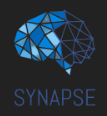

Yay, you made it to Week 2 of NLP! Last time we dealt with various ways to represent text numerically, this week we will dive into various deep learning algorithms specifically suited for NLP related applications.

An article covering multiple deep learning approaches utilised in NLP - https://medium.com/dair-ai/deep-learning-for-nlp-an-overview-of-recent-trends-d0d8f40a776d

#Create your own Embedding Layer

https://keras.io/api/layers/core_layers/embedding/

Look into what is the diiference between the embeddings we built in the previous task and the ones being built through this layer.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the IMDB dataset again
df = pd.read_csv('/content/gdrive/MyDrive/Synapse/IMDB_Dataset.csv')

In [ ]:
#Lemmatizing 50,000 reviews takes a lot of time, so if you are a busybee, run on only 5000 columns
df = df[:5000]

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import  word_tokenize

lem = WordNetLemmatizer()

In [ ]:
type(df['review'])

pandas.core.series.Series

In [ ]:
# Dust off the function you used last time to pre-process your data. Remember, the corpus should be a list of list of words
def text_transform(df):
  corpus = []
  #code here

  stop_words = set(stopwords.words('english'))

  for sentence in df:
    cleaned_sentence = re.sub(r'[^a-zA-Z\s]','',sentence.lower())
    word_tokens = (nltk.word_tokenize(cleaned_sentence))

    #removing stopwords
    for w in word_tokens:
      if w not in stop_words:
        corpus.append(lem.lemmatize(w))
  return corpus
corpus = text_transform(df['review'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,Dense,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

If you read up on Keras' Embedding layer, you know that it converts an indiced representation of your vocabulary into dense embedded vectors which you can feed into subsequent layers. We will use One-Hot representation to create this index. The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

In [ ]:
# This was me trying to understand embedding layer using chatGPT
from keras.models import Sequential
from keras.layers import Embedding
import numpy as np

# Example vocabulary and sentence
vocab_size = 6
sentence = "I love natural language processing"

# Tokenizing the sentence (assigning unique integer indices to each word)
word_to_index = {'I': 0, 'love': 1, 'natural': 2, 'language': 3, 'processing': 4}
index_to_word = {index: word for word, index in word_to_index.items()}
tokenized_sentence = [word_to_index[word] for word in sentence.split()]

# Padding the sequence to a fixed length
max_length = 6
padded_sequence = np.pad(tokenized_sentence, (0, max_length - len(tokenized_sentence)), 'constant')

# Creating a simple model with an Embedding layer
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=3, input_length=max_length))

# Passing the padded sequence through the model
embedded_sequence = model.predict(np.array([padded_sequence]))

# Displaying the results
print("Tokenized Sentence:", tokenized_sentence)
print("Padded Sequence:", padded_sequence)
print("Embedded Sequence:\n", embedded_sequence[0])


1/1 [==============================] - 0s 132ms/step
Tokenized Sentence: [0, 1, 2, 3, 4]
Padded Sequence: [0 1 2 3 4 0]
Embedded Sequence:
 [[ 0.02881999 -0.02381312  0.00124298]
 [ 0.04320176  0.02967255  0.02243142]
 [-0.02790698 -0.00044926 -0.04348965]
 [ 0.0251517   0.0212435   0.03787334]
 [-0.01658778  0.01551533 -0.0289724 ]
 [ 0.02881999 -0.02381312  0.00124298]]


In [ ]:
#Find vocabulary count of your corpus
#code
vocabulary = set(corpus)
len(vocabulary)

45766

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot

In [ ]:
#Look into what format the one_hot library requires and accordingly fill data in OH_rep
OH_rep = [review for review in df['review']]
#code

In [ ]:
for i in range(len(OH_rep)):
  OH_rep[i] = tf.keras.preprocessing.text.one_hot(
    OH_rep[i],
    len(vocabulary),
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    analyzer=None
)

In [ ]:
len(OH_rep[3])

138

In [ ]:
type(OH_rep[0])

list

In [ ]:
len(OH_rep)

5000

In [ ]:
max_length = [len(rep) for rep in OH_rep]

In [ ]:
max_length = max(max_length)

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
pre_pad = tf.keras.utils.pad_sequences(
    OH_rep,
    maxlen=max_length,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
) #code
print(pre_pad[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [ ]:
# Padding: 2 types: pre padding, post padding - try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here
pre_pad =  #code
print(pre_pad[0])

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

In [ ]:
len(pre_pad)

5000

In case you're still confused by Keras' Sequential Model - https://youtu.be/VGCHcgmZu24?si=ntdywfeqCcAjWWqZ

Lets make a custom Embedding Layer now.

In [ ]:
class CustomEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embed_dim):
        super(CustomEmbeddingLayer, self).__init__()
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        # Initialize the embedding matrix with random values
        self.embedding_matrix = self.add_weight("embedding_matrix",
                                               shape=(self.vocab_size, self.embed_dim),
                                               initializer="random_normal",
                                               trainable=True)

    def call(self, inputs):
        # Map integer indices to embedding vectors
        embedded_vectors = tf.gather(self.embedding_matrix, inputs)


        return embedded_vectors#Look into this (hint: you can use Tensorflow for this)



In [ ]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim=10

In [ ]:
# Create a sequential model with the custom embedding layer along with the appropriate vocabulary size and the decided dimension size.
# Remember to add a Flatten layer to convert the input from 3D to 2D, and a final Dense layer.
#Your code here
model = tf.keras.Sequential()
model.add(CustomEmbeddingLayer(len(vocabulary) +1 ,dim))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
#Compile the model with optimizer adam and loss mse
# Code here
model.compile(
    optimizer='adam',
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

In [ ]:
y=pd.get_dummies(df['sentiment'])
y=y.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split the dataset into train,test dataset
#Code here
X_train, X_test, y_train, y_test = train_test_split(pre_pad,y,random_state = 42)

In [ ]:
# yeh mera wala hai
model.fit(X_train,y_train, epochs=10, verbose=2)

Epoch 1/10
118/118 - 18s - loss: 0.2529 - accuracy: 0.5051 - 18s/epoch - 149ms/step
Epoch 2/10
118/118 - 14s - loss: 0.2243 - accuracy: 0.7949 - 14s/epoch - 115ms/step
Epoch 3/10
118/118 - 12s - loss: 0.1501 - accuracy: 0.9128 - 12s/epoch - 103ms/step
Epoch 4/10
118/118 - 8s - loss: 0.0802 - accuracy: 0.9603 - 8s/epoch - 71ms/step
Epoch 5/10
118/118 - 10s - loss: 0.0447 - accuracy: 0.9829 - 10s/epoch - 81ms/step
Epoch 6/10
118/118 - 7s - loss: 0.0268 - accuracy: 0.9931 - 7s/epoch - 58ms/step
Epoch 7/10
118/118 - 8s - loss: 0.0169 - accuracy: 0.9973 - 8s/epoch - 67ms/step
Epoch 8/10
118/118 - 7s - loss: 0.0112 - accuracy: 0.9995 - 7s/epoch - 58ms/step
Epoch 9/10
118/118 - 5s - loss: 0.0077 - accuracy: 0.9992 - 5s/epoch - 40ms/step
Epoch 10/10
118/118 - 6s - loss: 0.0055 - accuracy: 0.9997 - 6s/epoch - 48ms/step


In [ ]:
model.fit(X_train,y_train, epochs=10, verbose=2)

Epoch 1/10
110/110 - 14s - loss: 0.2515 - accuracy: 0.5097 - 14s/epoch - 126ms/step
Epoch 2/10
110/110 - 14s - loss: 0.2503 - accuracy: 0.5114 - 14s/epoch - 124ms/step
Epoch 3/10
110/110 - 11s - loss: 0.2498 - accuracy: 0.5009 - 11s/epoch - 98ms/step
Epoch 4/10
110/110 - 6s - loss: 0.2484 - accuracy: 0.5097 - 6s/epoch - 57ms/step
Epoch 5/10
110/110 - 9s - loss: 0.2461 - accuracy: 0.5080 - 9s/epoch - 82ms/step
Epoch 6/10
110/110 - 7s - loss: 0.2424 - accuracy: 0.5191 - 7s/epoch - 63ms/step
Epoch 7/10
110/110 - 6s - loss: 0.2399 - accuracy: 0.5194 - 6s/epoch - 54ms/step
Epoch 8/10
110/110 - 5s - loss: 0.2370 - accuracy: 0.5146 - 5s/epoch - 50ms/step
Epoch 9/10
110/110 - 4s - loss: 0.2352 - accuracy: 0.5083 - 4s/epoch - 38ms/step
Epoch 10/10
110/110 - 5s - loss: 0.2330 - accuracy: 0.5114 - 5s/epoch - 44ms/step


In [ ]:
model.evaluate(X_test,y_test,verbose=2)

40/40 - 0s - loss: 0.1163 - accuracy: 0.8456 - 275ms/epoch - 7ms/step


[0.11627979576587677, 0.8456000089645386]

In [ ]:
model.evaluate(X_test,y_test,verbose=2)

47/47 - 0s - loss: 0.2549 - accuracy: 0.5227 - 456ms/epoch - 10ms/step


[0.25491079688072205, 0.5226666927337646]

Now that you tried out your own embedding layer, use Keras' inbuilt Embedding layer and run your model again. Are the accuracies comparable?

In [ ]:
model_inbuilt = tf.keras.Sequential()
model_inbuilt.add(tf.keras.layers.Embedding(
    len(vocabulary) +1,
    dim,
    input_length=max_length
))
model_inbuilt.add(tf.keras.layers.Flatten())
model_inbuilt.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model_inbuilt.compile(
    optimizer='adam',
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

In [ ]:
history = model_inbuilt.fit(X_train,y_train, validation_data=(X_test,y_test), epochs = 10)

Epoch 1/10
118/118 [==============================] - 30s 195ms/step - loss: 0.2504 - accuracy: 0.5267 - val_loss: 0.2423 - val_accuracy: 0.7008
Epoch 2/10
118/118 [==============================] - 19s 165ms/step - loss: 0.1984 - accuracy: 0.8475 - val_loss: 0.1766 - val_accuracy: 0.8064
Epoch 3/10
118/118 [==============================] - 17s 142ms/step - loss: 0.1060 - accuracy: 0.9251 - val_loss: 0.1324 - val_accuracy: 0.8472
Epoch 4/10
118/118 [==============================] - 16s 138ms/step - loss: 0.0554 - accuracy: 0.9651 - val_loss: 0.1171 - val_accuracy: 0.8584
Epoch 5/10
118/118 [==============================] - 14s 115ms/step - loss: 0.0311 - accuracy: 0.9872 - val_loss: 0.1103 - val_accuracy: 0.8592
Epoch 6/10
118/118 [==============================] - 13s 109ms/step - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.1061 - val_accuracy: 0.8584
Epoch 7/10
118/118 [==============================] - 10s 81ms/step - loss: 0.0116 - accuracy: 0.9981 - val_loss: 0.1043 - val_acc

In [ ]:
import matplotlib.pyplot as plt

118/118 - 0s - loss: 0.0030 - accuracy: 1.0000 - 291ms/epoch - 2ms/step


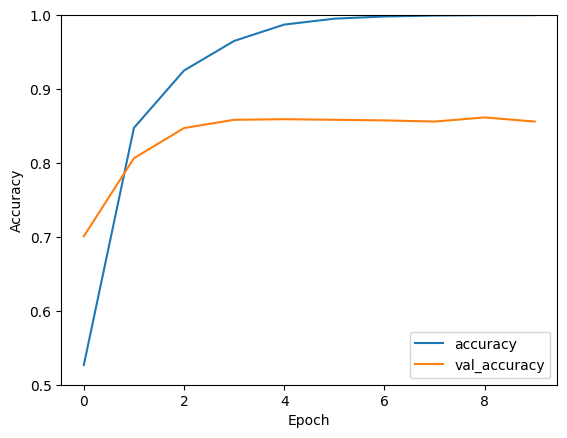

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_inbuilt.evaluate(X_train,y_train, verbose=2)

#Text Generation using LSTM

LSTM Networks are used for a wide variety of purposes ranging from sentiment analysis to time series analysis, but one of its most interesting applications is text generation, which has tremendous application. All Large Language Models like GPT essentially perform is text generation, where they complete your prompt with a response deemed most appropriate to complete the prompt.

But let's back up a bit. If you didn't know, what is an LSTM Network?
Rewatch these videos -
https://youtu.be/WCUNPb-5EYI?si=4URnZuUdGkMwNmTY

https://youtu.be/YCzL96nL7j0?si=iHYqMXEV9VF1q9x2



Hopefully you can now appreciate how an LSTM is well suited to handle the challenge of text generation. Actually, wait, explain to me how LSTM's are suited to handle this task and capture context.

Your answer here (COMPULSORY)

For text generating which heavily depends upon what was said/predicted earlier if we use a normal ANN it wouldn’t be feasible cuz the input to the network keeps on changing and we are not generating an entire paragraph at one time. Then the next possible step is Recurrent Neural Networks , since it has a feedback loop it takes into consideration the previous inputs and will help us generate accurate text based in previous text. But RNN have a big flaw which is Exploding and Vanishing Gradient problem. Since we are multiplying the output of each unit by a certain weight after some time, it either increases exponentially or tends to zero which in not ideal. The starting inputs have a significant  effect on the current predicting than it should have been. This is where LSTM comes into picture, LSTM helps retain long term memory without exploding/vanishing the gradient and helps predicting the current output based on current input and previous input. Since text generation requires the output from way before LSTM’s becomes very useful in this scenario. Using other models for text generating the maximum we can do is to use past few words to predict the next word. But with the help of LSTM we can even go back a few sentences and a few words to help us predict the next word.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [ ]:
import nltk

Now a question arises, what are we exactly generating? It would be foolish to assume the model just spits out a fully formed block of text. We can predict either the next character of next word in a sequence, and keep doing so until we have a block of text.

Which method is better, you ask?

https://medium.com/@john.l.tauscher/word-vs-character-text-generation-80a6dbba123a#:~:text=So%2C%20for%20a%20character%20generative,below%2C%20I%20had%2012%2C700%20inputs.

For this task, we will proceed with word generation.

We need a dataset for the model to learn how to generate text, and for that we're going to pick up the very wonderful book Alice In Wonderland by Lewis Caroll. Thanks, Lewis.

https://drive.google.com/file/d/1QOcIEov-jZqiJ6K7oDnaWup81Q7l_Ji3/view?usp=drive_link

In [ ]:
# Load your text data
file_path = '/content/gdrive/MyDrive/Synapse/aliceinwonderland.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [ ]:
# Tokenize the text. Use Tokenizer provided by Keras and fit the text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
#code here
text_sent_tokenised = nltk.sent_tokenize(text)
tokenizer.fit_on_texts(text_sent_tokenised)

tokenizer.fit_on_texts(text_sent_tokenised)#no of words in tokenizer + 1

In [ ]:
# when i am doing this it is vocablury is being converted into characters
tokenizer.fit_on_texts(text)
# tokenizer.fit_on_texts(text_sent_tokenised)

In [ ]:
keys  = tokenizer.word_index.keys()
list(keys)[:13]

['the',
 '”',
 'and',
 'to',
 'a',
 'she',
 'of',
 'it',
 'said',
 'alice',
 'in',
 'was',
 'you']

In [ ]:
vocabulary = len(tokenizer.word_index)
vocabulary

3079

Now, instead of just passing complete sentences into our model, we will pass n-grams of increasing length which predicts the next word. As a result, the last n-gram of a sentence consists mostly of words which have been predicted by earlier n-grams. This image should make it clearer -

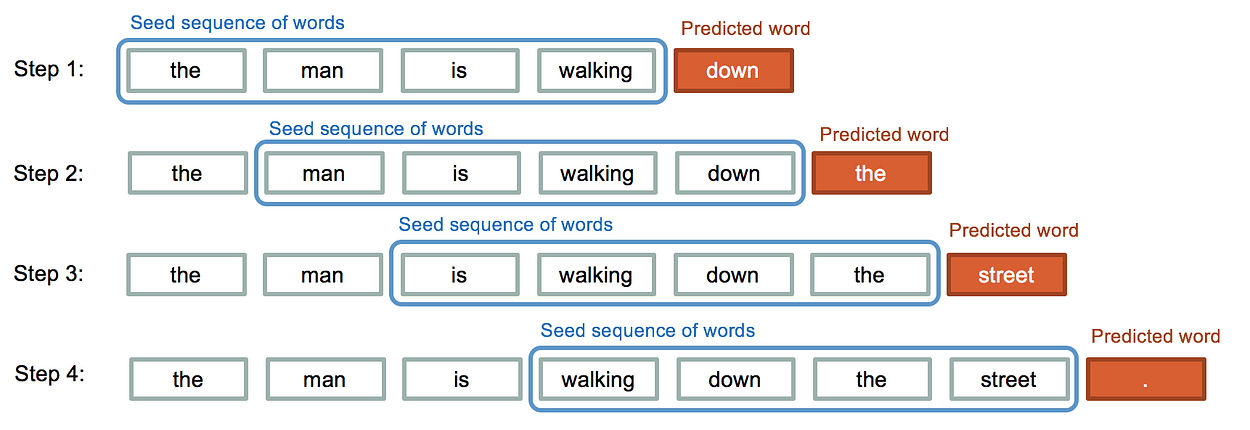

In [ ]:
# for line in text.split('\n'):
#     #use tokenizer.sequences_to_lists to convert your text into tokens and create a list called token_list
#     token_list = tokenizer.texts_to_sequences(line)
#     print(token_list)

In [ ]:
# Convert text to sequences
input_sequences = []
for line in text.split('\n'):
    #use tokenizer.sequences_to_lists to convert your text into tokens and create a list called token_list
    token_list = tokenizer.texts_to_sequences([line])[0] # why how kyu 😭😭😭😭😭 output mai list ke andar list uske andar list aa raha tha
    # toh upar wala line finally GPT marna pada, kyuki mere phele wale output ka padding nahi ho raha tha, padding ke liye format kasie chaye samaj
    # gaya tha but yeh fucntion ka use karke kaise lana ka yeh nahi samja, mai phele yeh token_list = tokenizer.texts_to_sequences(line) pass ka raha tha4

    #create n-grams with length 1,2,3....upto length of token_list and append to input_sequences (Include the word to be predicted)
    for i in range(2,len(token_list)):
      input_sequences.append(token_list[:i])


In [ ]:
input_sequences[:20]

The input_sequences list you got has n-grams of variable length, which isin't very good for training, so we pad the sequences to make them equal in length.

In [ ]:
max_length = [len(token) for token in input_sequences]
max_length = max(max_length)

In [ ]:
max_length

17

In [ ]:
# Pad sequences for equal length
max_sequence_length = max_length#find max length among all sequences
input_sequences = tf.keras.utils.pad_sequences(
    input_sequences,
    maxlen=max_sequence_length,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
) #use pad_sequences to perform prepadding
input_sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 314, 587], dtype=int32)

In [ ]:
# Create predictors and labels
X, y = input_sequences[:,:-1],input_sequences[:,-1] #X is sequence of words except the last word, y is the word to be predicted
y = tf.keras.utils.to_categorical(y)#Use to_categorical function of Keras to convert target words

In [ ]:
X

array([[  0,   0,   0, ...,   0,   0, 314],
       [  0,   0,   0, ...,   0, 314, 587],
       [  0,   0,   0, ...,   0,   0,  96],
       ...,
       [  0,   0,   0, ..., 397, 385, 355],
       [  0,   0,   0, ..., 385, 355,  21],
       [  0,   0,   0, ..., 355,  21,  13]], dtype=int32)

In [ ]:
#Create a sequential model with an Embedding layer with vocabulary, dimensions, and input_length as parameters, an LSTM with 100 units, and a Dense layer with softmax activation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocabulary,10,input_length=max_sequence_length-1))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(vocabulary, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=50,verbose=2) # increase the number of epochs for better accuracy, decrease for reducing time

Epoch 1/50
714/714 - 21s - loss: 6.2456 - accuracy: 0.0597 - 21s/epoch - 30ms/step
Epoch 2/50
714/714 - 10s - loss: 5.8782 - accuracy: 0.0652 - 10s/epoch - 13ms/step
Epoch 3/50
714/714 - 7s - loss: 5.6983 - accuracy: 0.0788 - 7s/epoch - 10ms/step
Epoch 4/50
714/714 - 7s - loss: 5.5235 - accuracy: 0.0892 - 7s/epoch - 9ms/step
Epoch 5/50
714/714 - 4s - loss: 5.3763 - accuracy: 0.0939 - 4s/epoch - 6ms/step
Epoch 6/50
714/714 - 5s - loss: 5.2394 - accuracy: 0.1044 - 5s/epoch - 7ms/step
Epoch 7/50
714/714 - 5s - loss: 5.0924 - accuracy: 0.1210 - 5s/epoch - 7ms/step
Epoch 8/50
714/714 - 5s - loss: 4.9408 - accuracy: 0.1327 - 5s/epoch - 7ms/step
Epoch 9/50
714/714 - 5s - loss: 4.8004 - accuracy: 0.1413 - 5s/epoch - 7ms/step
Epoch 10/50
714/714 - 5s - loss: 4.6634 - accuracy: 0.1522 - 5s/epoch - 7ms/step
Epoch 11/50
714/714 - 4s - loss: 4.5348 - accuracy: 0.1610 - 4s/epoch - 6ms/step
Epoch 12/50
714/714 - 4s - loss: 4.4107 - accuracy: 0.1698 - 4s/epoch - 6ms/step
Epoch 13/50
714/714 - 5s - los

In [ ]:
tokenizer.word_index

In [ ]:
model.save(filepath="/content/gdrive/MyDrive/Synapse/")

In [ ]:
for key in tokenizer.word_index:
  if tokenizer.word_index[key] == 998:
    print(key)

remarking


In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]  #Convert seed_text into tokens
        token_list =  tf.keras.utils.pad_sequences(
                    [token_list],
                    maxlen=max_sequence_len-1,
                    dtype='int32',
                    padding='pre',
                    truncating='pre',
                    value=0.0
                )#Perform prepadding on text
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted_probs) #return index of max probability value from the predictions

        output_word = ""
        #Search through the index list of your tokenizer (word_index) and if it matches the predicted index, save it as output_word and break
        for key in tokenizer.word_index:
          if tokenizer.word_index[key] == predicted:
            output_word = key

        seed_text += " " + output_word
    return seed_text

# Generate text
generated_text = generate_text("Alice was", 20, model, max_sequence_length)
print(generated_text)

Alice was a good deal too off off if you shall all the same height as she did not a queer before


Hey, not bad! There is some coherence in outputted text which matches the style of the input text. Now its your turn to try and make the output make more sense by improving the model. Add more layers, increase the epochs, use a bigger dataset, play around with it! For example, you can load a document which has all the works of shakespeare and see how the output changes.

Do you now have some more respect for poor ChatGPT, which spits highly coherent and verbose sentences in the blink of an eye? Imagine how much training went into that.

Well, if you look at it closely, we're kinda cheating (but not really) by having words in our tokenizer since our model always defaults to a word in the vocab and shows some coherence. If you really wanna get wild, try out character generation and get coherent outputs from that -

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

Starting out, obviously you get a lot of random character wishwash, but many many iterations in, you can see the model truly attempt to capture the word style of the original document.

# Question Answering using RNN




First things first, what are RNN's ?

https://www.youtube.com/watch?v=UNmqTiOnRfg

https://www.youtube.com/watch?v=OuYtk9Ymut4

For the adventurous people who need a challenge in life

https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/

So everybody's heard about Sentiment Analysis. We are NOT going to do that here. Well, not in its rudimentary way. For a sentence which we know is positive, the question would essentially be, what part of the sentence is positive, and given the sentence as context, the answer gives you the part of the sentence which caused it to be positive. All possible through the power of RNN's. Let's start.

https://drive.google.com/file/d/1tR82E9MmUpTUdJzrng8z1iVgBlBiX08A/view?usp=drive_link

In [ ]:
# write code to load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/Synapse/ques_ans.csv")
# df = df[:5000] # i had to make the database smaller otherwise context_tokenizer.fit_on_text was taking a lot of time

In [ ]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
context_tokenizer = Tokenizer()
#Fit your tokenizer on the text column
for text in df['text']:
  text = re.sub(r'[^a-zA-Z\s]','',str(text))
  context_tokenizer.fit_on_texts([text])


In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# context_tokenizer = Tokenizer()
# #Fit your tokenizer on the text column
# for text in df['text']:
#   text = re.sub(r'[^a-zA-Z\s]','',str(text))
#   context_tokenizer.fit_on_texts([text])

context = [context_tokenizer.texts_to_sequences([re.sub(r'[^a-zA-Z\s]','',str(text))])[0] for text in df['text']]   #Convert texts to sequences with the tokenizer for text column

answers = [context_tokenizer.texts_to_sequences([re.sub(r'[^a-zA-Z\s]','',str(text))])[0] for text in df['selected_text']]#Convert texts to sequences with the tokenizer for the selected_text column

#Finding the beginning and ending position of the answer in the context list
beg_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]
end_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
context = np.array(pad_sequences(context, maxlen=36, padding='post', truncating='post'))
#Do the same for beg_pos and end_pos
beg_pos = np.array(pad_sequences(beg_pos, maxlen=36, padding='post', truncating='post'))
end_pos = np.array(pad_sequences(end_pos, maxlen=36, padding='post', truncating='post'))

# Using numpy, check for rows in 'beg_pos' where all elements are zero
beg_pose_with_all_zeros = np.all(beg_pos == 0, axis =1)


In [ ]:
# Filter out rows in the arrays context, beg_pos, and end_pos where 'beg_pos' is all zero
for i in range(len(beg_pos)):
  if beg_pose_with_all_zeros[i] == True:
    updated_array_beg = np.delete(beg_pos, i, axis=0)
    updated_array_end = np.delete(end_pos, i, axis=0)
    updated_array_context = np.delete(context, i, axis=0)


beg_pos = updated_array_beg
end_pos = updated_array_end
context = updated_array_context

In [ ]:
# Add a new axis to 'beg_pos' and 'end_pos'
beg_pos = np.expand_dims(beg_pos, axis=2)
end_pos = np.expand_dims(end_pos, axis=2)

# Concatenate 'beg_pos' and 'end_pos' along the third axis, creating a 3D array
ans_vec = np.concatenate((beg_pos, end_pos), axis=2)

context.shape, beg_pos.shape, end_pos.shape, ans_vec.shape

((27480, 36), (27480, 36, 1), (27480, 36, 1), (27480, 36, 2))

In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# context = np.array(pad_sequences(context, maxlen=36, padding='post', truncating='post'))
# #Do the same for beg_pos and end_pos


# # Using numpy, check for rows in 'beg_pos' where all elements are zero


# # Filter out rows in the arrays context, beg_pos, and end_pos where 'beg_pos' is all zero


# # Add a new axis to 'beg_pos' and 'end_pos'
# beg_pos = np.expand_dims(beg_pos, axis=2)
# end_pos = np.expand_dims(end_pos, axis=2)

# # Concatenate 'beg_pos' and 'end_pos' along the third axis, creating a 3D array
# ans_vec = np.concatenate((beg_pos, end_pos), axis=2)

# context.shape, beg_pos.shape, end_pos.shape, ans_vec.shape

((26235, 36), (26235, 36, 1), (26235, 36, 1), (26235, 36, 2))

In [ ]:
question_tokenizer = Tokenizer()
question_tokenizer.fit_on_texts(df.sentiment.fillna(''))
question = question_tokenizer.texts_to_sequences(df.sentiment.fillna(''))
# write code to pad sequences for question, like in the previous cell
question = np.array(pad_sequences(question, maxlen=36, padding='post', truncating='post'))
# Filter out rows in the question array where 'beg_pos' is all zero
for i in range(len(beg_pos)):
  if beg_pose_with_all_zeros[i] == True:
    updated_array_question = np.delete(question, i, axis=0)
question = updated_array_question
question.shape

(27480, 36)

In [ ]:
# question_tokenizer = Tokenizer()
# question_tokenizer.fit_on_texts(df.sentiment.fillna(''))
# question = question_tokenizer.texts_to_sequences(df.sentiment.fillna(''))
# # write code to pad sequences for question, like in the previous cell

# # Filter out rows in the question array where 'beg_pos' is all zero


# question.shape

(26235, 36)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# perform train test split on context, question and ans_vec and print its shape
context_train, context_test, question_train, question_test, ans_vec_train, ans_vec_test = train_test_split(context,question, ans_vec, test_size=0.33)

In [ ]:
print("Shapes after train-test split:")
print("Context Train:", context_train.shape)
print("Context Test:", context_test.shape)
print("Question Train:", question_train.shape)
print("Question Test:", question_test.shape)
print("Answer Vector Train:", ans_vec_train.shape)
print("Answer Vector Test:", ans_vec_test.shape)

Shapes after train-test split:
Context Train: (18411, 36)
Context Test: (9069, 36)
Question Train: (18411, 36)
Question Test: (9069, 36)
Answer Vector Train: (18411, 36, 2)
Answer Vector Test: (9069, 36, 2)


In [ ]:
# perform train test split on context, question and ans_vec and print its shape

((23611, 36),
 (2624, 36),
 (23611, 36),
 (2624, 36),
 (23611, 36, 2),
 (2624, 36, 2))

https://keras.io/api/layers/merging_layers/concatenate/

GRU(Gated Recurrent Units) - https://youtu.be/tOuXgORsXJ4?si=BG9l-HXTijxaovHO

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers as L

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 context (InputLayer)        [(None, 36)]                 0         []                            
                                                                                                  
 question (InputLayer)       [(None, 36)]                 0         []                            
                                                                                                  
 context_embeddings (Embedd  (None, 36, 64)               1786624   ['context[0][0]']             
 ing)                                                                                             
                                                                                                  
 question_embeddings (Embed  (None, 36, 64)               256       ['question[0][0]']        

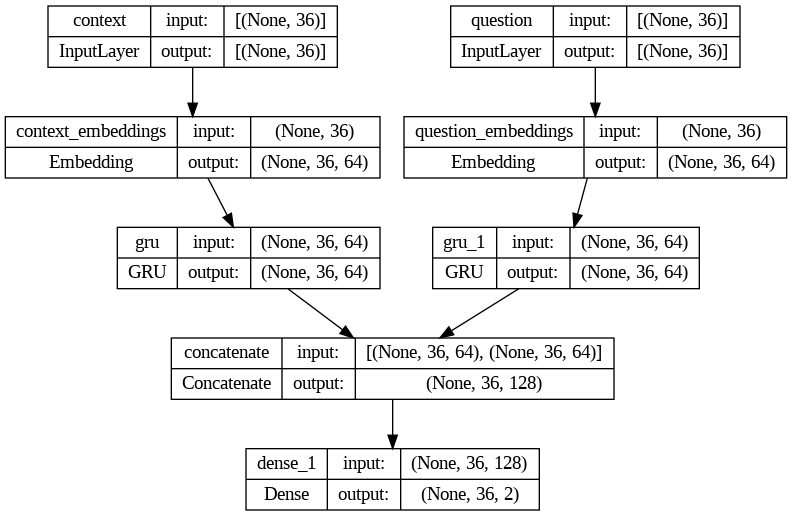

In [ ]:
EMBED_DIM = 64
N_REC = 64

# create input layers for context_inp and question_input. Name it context and question
context_inp = L.Input(shape = (36,), name='context')
question_inp = L.Input(shape = (36,), name='question')
context_emb = L.Embedding(len(context_tokenizer.word_index)+1, EMBED_DIM, name='context_embeddings')(context_inp)
question_emb = L.Embedding(len(question_tokenizer.word_index)+1, EMBED_DIM, name='question_embeddings')(question_inp)

# create GRU layers for context_emb and question_emb, keep return_sequences = True
context_gru = L.GRU(N_REC, return_sequences=True)(context_emb)
question_gru = L.GRU(N_REC, return_sequences=True)(question_emb)

#write code to concatenate these 2 embedding layers, and create a Dense layer for the output
concatenated = L.Concatenate(axis=-1)([context_gru, question_gru])
outputs = L.Dense(2, activation='sigmoid')(concatenated)

model = keras.Model(inputs=[context_inp, question_inp], outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-4))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 context (InputLayer)        [(None, 36)]                 0         []                            
                                                                                                  
 question (InputLayer)       [(None, 36)]                 0         []                            
                                                                                                  
 context_embeddings (Embedd  (None, 36, 64)               1702336   ['context[0][0]']             
 ing)                                                                                             
                                                                                                  
 question_embeddings (Embed  (None, 36, 64)               256       ['question[0][0]']        

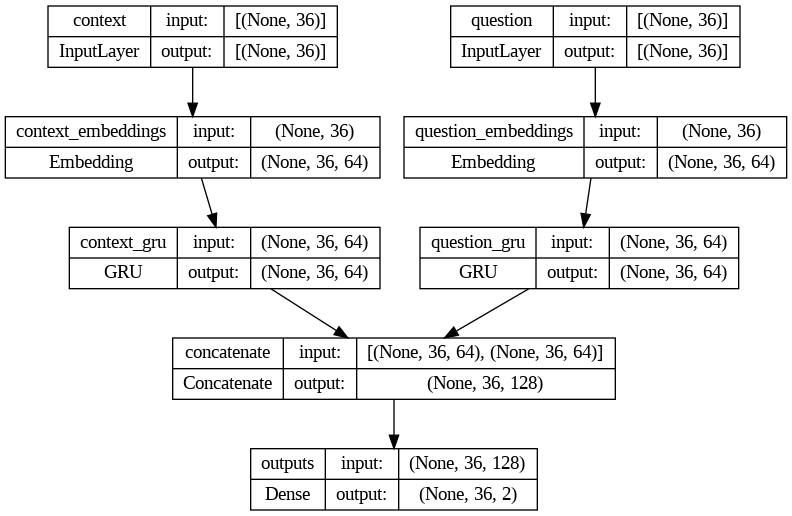

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers as L

# EMBED_DIM = 64
# N_REC = 64

# # create input layers for context_inp and question_input. Name it context and question


# context_emb = L.Embedding(len(context_tokenizer.word_index)+1, EMBED_DIM, name='context_embeddings')(context_inp)
# question_emb = L.Embedding(len(question_tokenizer.word_index)+1, EMBED_DIM, name='question_embeddings')(question_inp)

# # create GRU layers for context_emb and question_emb, keep return_sequences = True


# #write code to concatenate these 2 embedding layers, and create a Dense layer for the output


# model = keras.Model(inputs=[context_inp, question_inp], outputs=outputs)
# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-4))
# model.summary()
# keras.utils.plot_model(model, show_shapes=True)

In [ ]:
es = keras.callbacks.EarlyStopping(min_delta=1e-4, patience=5, verbose=1, restore_best_weights=True)
rlp = keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1)

# fit the model with train data for [context, question] and ans_vec, and similarly write code for validation data, store it in a variable named 'history'
# do not forget to keep the number of epochs as 25 and the callbacks as es and rlp
context_test, context_valid, question_test, question_valid, ans_vec_test, ans_vec_valid = train_test_split(context_test,question_test, ans_vec_test, test_size=0.5)
history  = model.fit([context_train,question_train], ans_vec_train, validation_data=([context_valid,question_valid], ans_vec_valid), callbacks=[es,rlp], epochs = 25)

Epoch 1/25
576/576 [==============================] - 30s 42ms/step - loss: 0.1954 - val_loss: 0.0838 - lr: 1.0000e-04
Epoch 2/25
576/576 [==============================] - 9s 15ms/step - loss: 0.0793 - val_loss: 0.0767 - lr: 1.0000e-04
Epoch 3/25
576/576 [==============================] - 6s 10ms/step - loss: 0.0723 - val_loss: 0.0696 - lr: 1.0000e-04
Epoch 4/25
576/576 [==============================] - 6s 11ms/step - loss: 0.0632 - val_loss: 0.0611 - lr: 1.0000e-04
Epoch 5/25
576/576 [==============================] - 7s 12ms/step - loss: 0.0543 - val_loss: 0.0545 - lr: 1.0000e-04
Epoch 6/25
576/576 [==============================] - 5s 9ms/step - loss: 0.0479 - val_loss: 0.0526 - lr: 1.0000e-04
Epoch 7/25
576/576 [==============================] - 7s 13ms/step - loss: 0.0443 - val_loss: 0.0513 - lr: 1.0000e-04
Epoch 8/25
576/576 [==============================] - 6s 10ms/step - loss: 0.0420 - val_loss: 0.0515 - lr: 1.0000e-04
Epoch 9/25
574/576 [============================>.] - ET

In [ ]:
# es = keras.callbacks.EarlyStopping(min_delta=1e-4, patience=5, verbose=1, restore_best_weights=True)
# rlp = keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1)

# # fit the model with train data for [context, question] and ans_vec, and similarly write code for validation data, store it in a variable named 'history'
# # do not forget to keep the number of epochs as 25 and the callbacks as es and rlp
# context_test, context_valid, question_test, question_valid, ans_vec_test, ans_vec_valid = train_test_split(context_test,question_test, ans_vec_test, test_size=0.5)
# history  = model.fit([context_train,question_train], ans_vec_train, validation_data=([context_valid,question_valid], ans_vec_valid), callbacks=[es,rlp], epochs = 25)

Epoch 1/25
738/738 [==============================] - 38s 38ms/step - loss: 0.1764 - val_loss: 0.0836 - lr: 1.0000e-04
Epoch 2/25
738/738 [==============================] - 9s 12ms/step - loss: 0.0809 - val_loss: 0.0748 - lr: 1.0000e-04
Epoch 3/25
738/738 [==============================] - 7s 10ms/step - loss: 0.0703 - val_loss: 0.0628 - lr: 1.0000e-04
Epoch 4/25
738/738 [==============================] - 8s 11ms/step - loss: 0.0578 - val_loss: 0.0526 - lr: 1.0000e-04
Epoch 5/25
738/738 [==============================] - 8s 11ms/step - loss: 0.0492 - val_loss: 0.0488 - lr: 1.0000e-04
Epoch 6/25
738/738 [==============================] - 8s 11ms/step - loss: 0.0457 - val_loss: 0.0483 - lr: 1.0000e-04
Epoch 7/25
738/738 [==============================] - 8s 10ms/step - loss: 0.0437 - val_loss: 0.0484 - lr: 1.0000e-04
Epoch 8/25
738/738 [==============================] - ETA: 0s - loss: 0.0422
Epoch 8: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
738/738 [===========

In [ ]:
idx = 28
query_context = context_valid[idx:idx+1]
query_question = question_valid[idx:idx+1]
query_ans_vec = ans_vec_valid[idx:idx+1]
query_ans_beg, query_ans_end  = np.ravel(ans_vec_valid[idx:idx+1].argmax(axis=1))  #Look into what this does
print('Context:', context_tokenizer.sequences_to_texts(query_context))
print('Question:', question_tokenizer.sequences_to_texts(query_question))
print('Answer:', context_tokenizer.sequences_to_texts([query_context[0][query_ans_beg: query_ans_end+1]]))
pred_ans_beg, pred_ans_end = np.ravel(model([query_context, query_question]).numpy().argmax(axis=1))
print('Predicted Answer:', context_tokenizer.sequences_to_texts([query_context[0][pred_ans_beg: pred_ans_end+1]]))

Context: ['people wat the hell is a follower on twitter i dont get it']
Question: ['negative']
Answer: ['wat']
Predicted Answer: ['people']


In [ ]:
# idx = 28
# query_context = context_valid[idx:idx+1]
# query_question = question_valid[idx:idx+1]
# query_ans_vec = ans_vec_valid[idx:idx+1]
# query_ans_beg, query_ans_end  = np.ravel(ans_vec_valid[idx:idx+1].argmax(axis=1))  #Look into what this does
# print('Context:', context_tokenizer.sequences_to_texts(query_context))
# print('Question:', question_tokenizer.sequences_to_texts(query_question))
# print('Answer:', context_tokenizer.sequences_to_texts([query_context[0][query_ans_beg: query_ans_end+1]]))
# pred_ans_beg, pred_ans_end = np.ravel(model([query_context, query_question]).numpy().argmax(axis=1))
# print('Predicted Answer:', context_tokenizer.sequences_to_texts([query_context[0][pred_ans_beg: pred_ans_end+1]]))

Context: ['benson loved the macaramber']
Question: ['positive']
Answer: ['loved']
Predicted Answer: ['loved']


Just for fun, here is a cell to put custom inputs and predict which part of the sentence matches the question you input.

In [ ]:
def predict_custom_input(custom_context, custom_question):
    # Tokenize and preprocess the custom input
    custom_context_seq = context_tokenizer.texts_to_sequences([custom_context])
    custom_context_padded = np.array(pad_sequences(custom_context_seq, maxlen=36, padding='post', truncating='post'))

    custom_question_seq = question_tokenizer.texts_to_sequences([custom_question])
    custom_question_padded = np.array(pad_sequences(custom_question_seq, maxlen=36, padding='post', truncating='post'))

    # Make predictions using the trained model
    predictions = model.predict([custom_context_padded, custom_question_padded])

    # Extract predicted answer indices
    pred_ans_beg, pred_ans_end = np.ravel(predictions.argmax(axis=1))

    # Convert indices to text
    pred_answer_text = context_tokenizer.sequences_to_texts([custom_context_padded[0][pred_ans_beg: pred_ans_end+1]])

    # Print the results
    print('Custom Input:')
    print('Context:', custom_context)
    print('Question:', custom_question)
    print('Predicted Answer:', pred_answer_text)

# Example usage:
custom_context_input = input("Your custom context goes here.")
custom_question_input = input("Your custom question goes here.")
predict_custom_input(custom_context_input, custom_question_input)

Your custom context goes here.he was sad
Your custom question goes here.negative
1/1 [==============================] - 0s 29ms/step
Custom Input:
Context: he was sad
Question: negative
Predicted Answer: ['sad']


# <font color='#4879E2'>More resources</font>

Yoav Goldberg's book [Neural Network Methods for Natural Language Processing](http://www.morganclaypool.com/doi/abs/10.2200/S00762ED1V01Y201703HLT037) is a thorough introduction to neural networks for NLP tasks in general.

If you'd like to learn more about what Keras is doing under the hood, there is a [Theano tutorial](http://deeplearning.net/tutorial/lstm.html) that also applies an RNN to sentiment prediction, using the same dataset here

Andrej Karpathy's blog post [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) is very helpful for understanding the mathematical details of an RNN, applied to the task of language modeling. It also provides raw Python code with an implementation of the backpropagation algorithm.

TensorFlow also has an RNN language model [tutorial](https://www.tensorflow.org/versions/r0.12/tutorials/recurrent/index.html) using the Penn Treebank dataset

Chris Olah provides a good [explanation](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) of how LSTM RNNs work (this explanation also applies to the GRU model used here)

Denny Britz's [tutorial](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) documents well both the technical details of RNNs and their implementation in Python.

#Research Task

Look into how Name Entity Recognition and Parts of Speech Tagging work and show your research for the same.